# Objetivo del notebook:
1.   Tener un estudio descriptivo del consumo energetico de los clientes de UTE.
2.   Obtener una descripción de los datos de UTE
3.   Realizar un modelo Prophet de los datos de UTE (predicción 2024-2044)



# Carga de archivos

In [16]:
!pip install pandas openpyxl matplotlib scikit-learn seaborn
# import pandas as pd
# import os

# # Ruta local al archivo
# desktop_path = os.path.expanduser("~/GitHub/SOLAR_LCOE_UY")
# file_path = os.path.join(desktop_path, "data/raw/datos_horarios_con_temeperatura.csv")



# # Leer el archivo CSV
# data = pd.read_csv(file_path)

# print(data.head())

# # Obtener solo carpetas ordenadas alfabéticamente
# if os.path.exists(base_path):
#     folders = sorted([item for item in os.listdir(base_path)
#                       if os.path.isdir(os.path.join(base_path, item))])
#     print("Carpetas en My Drive (ordenadas alfabéticamente):")
#     print(folders)
# else:
#     print(f"La ruta no existe: {base_path}")

import pandas as pd
import os

# Ruta local al archivo
desktop_path = os.path.expanduser("~/GitHub/SOLAR_LCOE_UY")
file_path = os.path.join(desktop_path, "data/raw/datos_horarios_con_temeperatura.csv")

# Leer el archivo CSV
data = pd.read_csv(file_path)

In [17]:
# Cambiar el directorio a la carpeta específica
folder_path = os.path.join(desktop_path, "data/raw/")

# Listar los archivos en esa carpeta
files_in_folder = os.listdir(folder_path)
print("Archivos en la carpeta:", files_in_folder)

file1_path = os.path.join(folder_path, 'Documento 2.xlsx')
file2_path = os.path.join(folder_path, 'Documento 3.xlsx')
file3_path = os.path.join(folder_path, 'Documento 4.xlsx')
df1 = pd.ExcelFile(file1_path)
df2 = pd.ExcelFile(file2_path)
df3 = pd.ExcelFile(file3_path)
df1_combined = pd.concat([df1.parse(sheet_name) for sheet_name in df1.sheet_names])
df2_combined = pd.concat([df2.parse(sheet_name) for sheet_name in df2.sheet_names])
df3_combined = pd.concat([df3.parse(sheet_name) for sheet_name in df3.sheet_names])
final_df = pd.concat([df1_combined, df2_combined, df3_combined], ignore_index=True)
output_path = os.path.join(folder_path, 'combined_file.csv')
final_df.to_csv(output_path, index=False)
print(f"Archivo combinado guardado en: {output_path}")


Archivos en la carpeta: ['.DS_Store', 'predicciones_mensuales_todas.csv', 'datos_horarios_con_temeperatura.csv', 'suma_totales_por_año.csv', 'combined_file.csv', 'metricas_modelo_prophet.csv', 'demanda_anual_sectores.csv', 'variacion_porcentual_anual.csv', 'totales_por_año_excluyendo_2024.csv', 'RadiationSim2024_2044.csv', 'Documento 4.xlsx', 'predicciones_anuales_1999_2044.csv', 'predicciones_mensuales_por_sector', 'Documento 3.xlsx', 'Documento 2.xlsx']
Archivo combinado guardado en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/combined_file.csv


In [18]:
import pandas as pd

# Ruta al archivo combinado en Google Drive
file_path = os.path.join(folder_path,'combined_file.csv')

# Cargar el archivo combinado
data = pd.read_csv(file_path)

# Eliminar las primeras 3 filas y reiniciar el índice
data_cleaned = data.iloc[3:].reset_index(drop=True)

# Renombrar las columnas relevantes
data_cleaned.rename(columns={"Unnamed: 1": "Año", "Unnamed: 10": "Total"}, inplace=True)

# Filtrar las columnas de interés y convertir "Año" y "Total" a valores numéricos
data_cleaned["Año"] = pd.to_numeric(data_cleaned["Año"], errors="coerce")
data_cleaned["Total"] = pd.to_numeric(data_cleaned["Total"], errors="coerce")

# Agrupar por año y sumar los totales
suma_por_año = data_cleaned.groupby("Año")["Total"].sum()

# Guardar el resultado como CSV en la misma carpeta de Google Drive
output_path = os.path.join(folder_path,'suma_totales_por_año.csv')
suma_por_año.to_csv(output_path, index=True)

print(f"Suma de totales por año guardada en: {output_path}")



Suma de totales por año guardada en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/suma_totales_por_año.csv


# EDA de los archivos de UTE

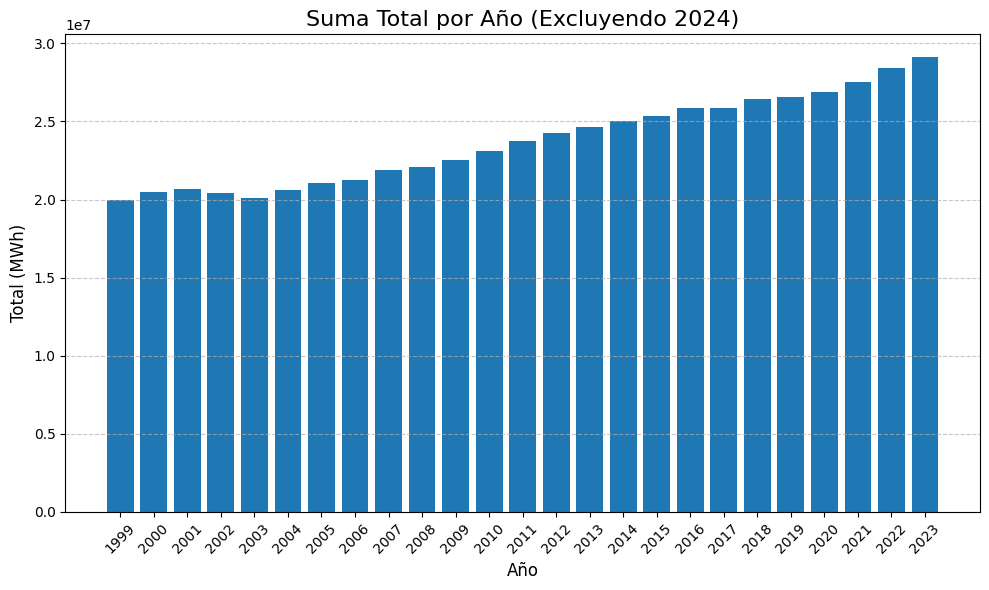

In [19]:
import matplotlib.pyplot as plt

# Filtrar los datos excluyendo el año 2024
suma_por_año_filtered = suma_por_año[suma_por_año.index != 2024.0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suma_por_año_filtered.index, suma_por_año_filtered.values, width=0.8)

# Configurar el gráfico
plt.title('Suma Total por Año (Excluyendo 2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total (MWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(suma_por_año_filtered.index.astype(int), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [20]:
import pandas as pd

# Ruta al archivo combinado en Google Drive
file_path = os.path.join(folder_path, 'combined_file.csv')

# Cargar el archivo combinado
data = pd.read_csv(file_path)

# Eliminar las primeras 3 filas y reiniciar el índice
data_cleaned = data.iloc[3:].reset_index(drop=True)

# Renombrar las columnas relevantes
data_cleaned.rename(columns={"Unnamed: 1": "Año", "Unnamed: 10": "Total"}, inplace=True)

# Filtrar las columnas de interés y convertir "Año" y "Total" a valores numéricos
data_cleaned["Año"] = pd.to_numeric(data_cleaned["Año"], errors="coerce")
data_cleaned["Total"] = pd.to_numeric(data_cleaned["Total"], errors="coerce")

# Agrupar por año y sumar los totales
suma_por_año = data_cleaned.groupby("Año")["Total"].sum()

# Filtrar los datos excluyendo el año 2024
suma_por_año_filtered = suma_por_año[suma_por_año.index != 2024.0]

# Crear un DataFrame con los totales por año
tabla_totales_df = suma_por_año_filtered.reset_index()
tabla_totales_df.columns = ["Año", "Total"]

# Configurar el formato para mostrar todas las cifras sin notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Mostrar la tabla
print(tabla_totales_df)

# Si prefieres guardar la tabla en un archivo CSV:
output_path = os.path.join(folder_path, 'totales_por_año_excluyendo_2024.csv')
tabla_totales_df.to_csv(output_path, index=False)
print(f"Tabla guardada en: {output_path}")


     Año      Total
0  1,999 19,969,749
1  2,000 20,501,949
2  2,001 20,651,725
3  2,002 20,426,406
4  2,003 20,088,550
5  2,004 20,611,513
6  2,005 21,033,256
7  2,006 21,232,045
8  2,007 21,896,319
9  2,008 22,093,035
10 2,009 22,523,658
11 2,010 23,106,897
12 2,011 23,779,558
13 2,012 24,231,618
14 2,013 24,641,917
15 2,014 25,038,581
16 2,015 25,334,772
17 2,016 25,850,807
18 2,017 25,881,913
19 2,018 26,435,069
20 2,019 26,571,366
21 2,020 26,917,038
22 2,021 27,506,375
23 2,022 28,434,272
24 2,023 29,124,160
Tabla guardada en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/totales_por_año_excluyendo_2024.csv


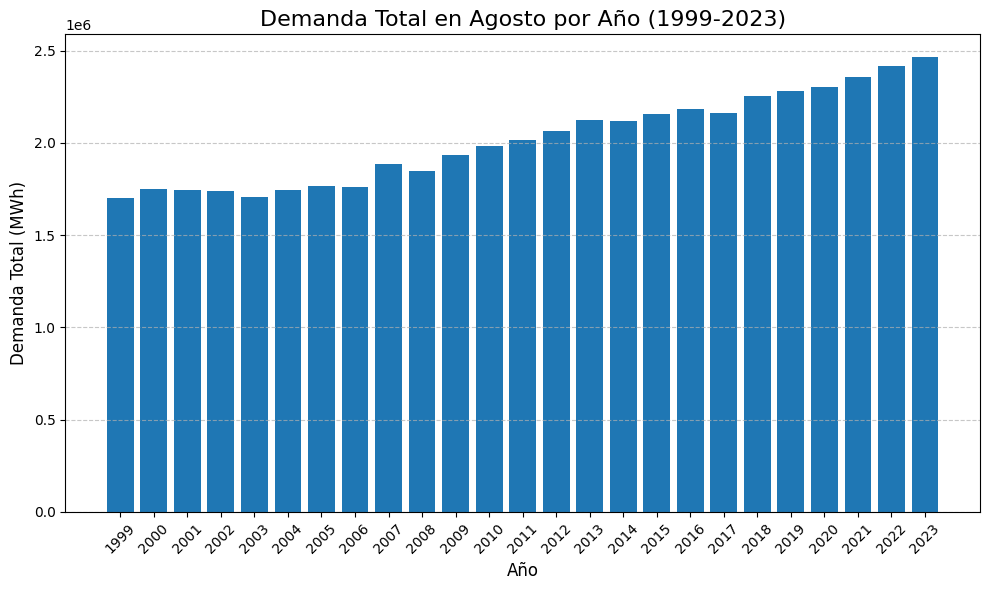

In [21]:
# Filtrar los datos para obtener las filas correspondientes al mes 8 (agosto)
data_cleaned.rename(columns={"Unnamed: 2": "Mes"}, inplace=True)  # Renombrar la columna del mes
data_cleaned["Mes"] = pd.to_numeric(data_cleaned["Mes"], errors="coerce")

# Filtrar los datos para el mes 8 y años entre 1999 y 2023
demanda_agosto = data_cleaned[
    (data_cleaned["Mes"] == 8) &
    (data_cleaned["Año"] >= 1999) &
    (data_cleaned["Año"] <= 2023)
]

# Agrupar por año y sumar los totales del mes 8
demanda_agosto_por_año = demanda_agosto.groupby("Año")["Total"].sum()

# Graficar la demanda del mes 8 por año
plt.figure(figsize=(10, 6))
plt.bar(demanda_agosto_por_año.index, demanda_agosto_por_año.values, width=0.8)

# Configurar el gráfico
plt.title('Demanda Total en Agosto por Año (1999-2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda Total (MWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(demanda_agosto_por_año.index.astype(int), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


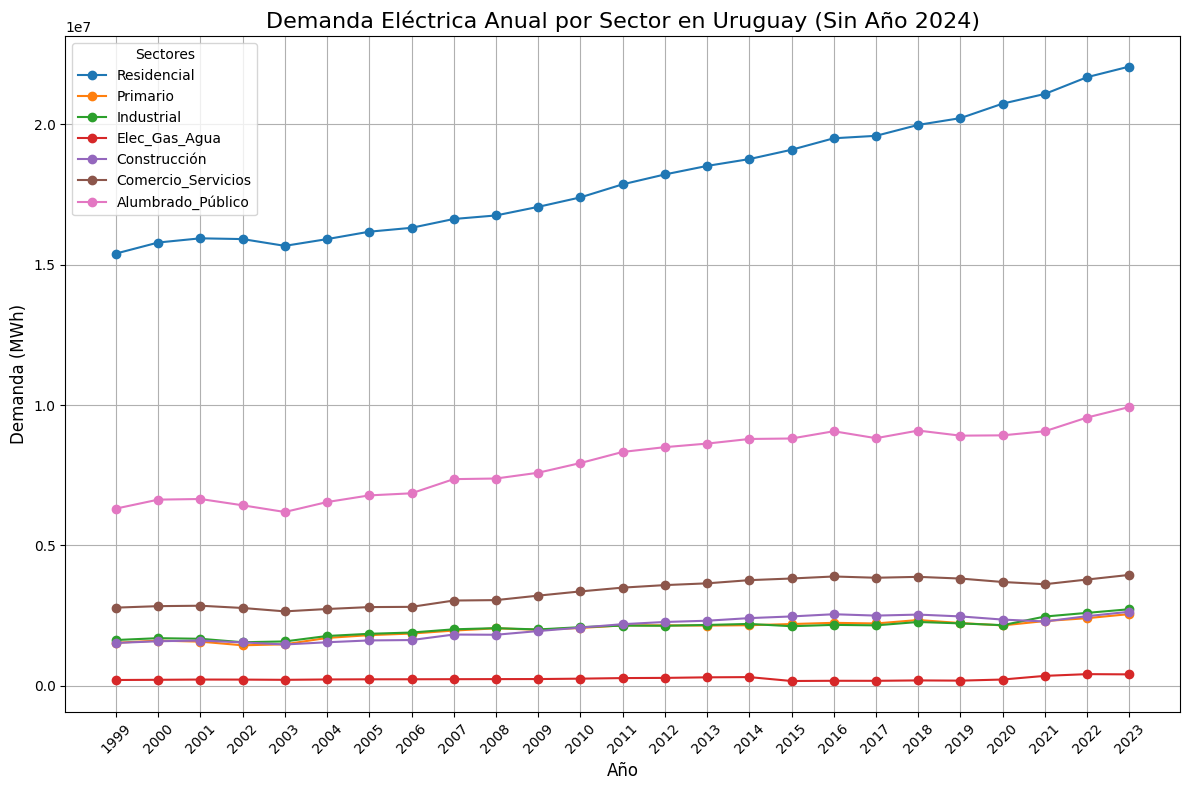

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y renombrar columnas relevantes
file_path = os.path.join(folder_path, 'combined_file.csv')
data = pd.read_csv(file_path)
data_cleaned = data.iloc[3:].reset_index(drop=True)

data_cleaned.rename(columns={
    "Unnamed: 1": "Año",
    "Unnamed: 2": "Mes",
    "Unnamed: 3": "Residencial",
    "Unnamed: 4": "Primario",
    "Unnamed: 5": "Industrial",
    "Unnamed: 6": "Elec_Gas_Agua",
    "Unnamed: 7": "Construcción",
    "Unnamed: 8": "Comercio_Servicios",
    "Unnamed: 9": "Alumbrado_Público",
    "Unnamed: 10": "Total"
}, inplace=True)

# Convertir columnas relevantes a valores numéricos
sectores = ["Residencial", "Primario", "Industrial", "Elec_Gas_Agua",
            "Construcción", "Comercio_Servicios", "Alumbrado_Público"]

for col in sectores:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

data_cleaned["Año"] = pd.to_numeric(data_cleaned["Año"], errors='coerce')

# Agrupar por año y sumar las demandas por sector
demanda_anual_sectores = data_cleaned.groupby("Año")[sectores].sum()

# Eliminar el año 2024
demanda_anual_sectores = demanda_anual_sectores[demanda_anual_sectores.index != 2024.0]

# Graficar la demanda anual por sector
plt.figure(figsize=(12, 8))
for sector in sectores:
    plt.plot(demanda_anual_sectores.index, demanda_anual_sectores[sector], marker='o', label=sector)

# Configurar el gráfico
plt.title('Demanda Eléctrica Anual por Sector en Uruguay (Sin Año 2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(demanda_anual_sectores.index.astype(int), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



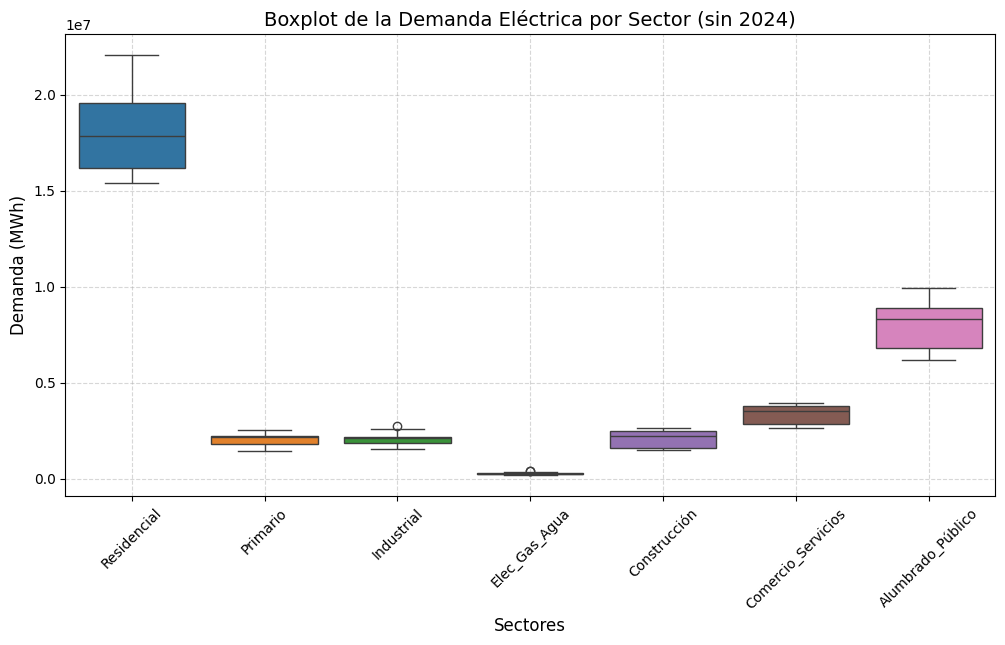

In [23]:
# Eliminar el año 2024
demanda_anual_sectores = demanda_anual_sectores[demanda_anual_sectores.index != 2024.0]
import seaborn as sns

# Crear un boxplot para analizar la distribución de cada sector
plt.figure(figsize=(12, 6))
sns.boxplot(data=demanda_anual_sectores)
plt.title("Boxplot de la Demanda Eléctrica por Sector (sin 2024)", fontsize=14)
plt.xlabel("Sectores", fontsize=12)
plt.ylabel("Demanda (MWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


No se observan valores outliers en los datos suministrados por la ute

In [24]:
import pandas as pd

# Generar la tabla de demanda eléctrica anual por sector
tabla_demanda_sectores = demanda_anual_sectores.reset_index()

# Calcular la variación porcentual año a año
variacion_porcentual = demanda_anual_sectores.pct_change() * 100

# Añadir una columna para el año
variacion_porcentual["Año"] = demanda_anual_sectores.index

# Reordenar las columnas para tener el año al inicio
variacion_porcentual = variacion_porcentual.reset_index(drop=True)
variacion_porcentual = variacion_porcentual[["Año"] + [col for col in variacion_porcentual.columns if col != "Año"]]

# Mostrar ambas tablas
print("Demanda Anual por Sector (Sin Año 2024):")
print(tabla_demanda_sectores)

print("\nVariación Porcentual Anual por Sector:")
print(variacion_porcentual)

# Opcional: Guardar ambas tablas como CSV
tabla_demanda_sectores.to_csv(os.path.join(folder_path, 'demanda_anual_sectores.csv'), index=False)
variacion_porcentual.to_csv(os.path.join(folder_path, 'variacion_porcentual_anual.csv'), index=False)
print("Archivos guardados en Google Drive.")


Demanda Anual por Sector (Sin Año 2024):
     Año  Residencial  Primario  Industrial  Elec_Gas_Agua  Construcción  \
0  1,999   15,396,827 1,531,027   1,629,422        205,166     1,524,289   
1  2,000   15,789,429 1,608,559   1,695,191        212,367     1,585,854   
2  2,001   15,939,023 1,571,700   1,673,547        221,064     1,610,316   
3  2,002   15,912,032 1,441,302   1,550,050        219,557     1,544,929   
4  2,003   15,670,526 1,476,989   1,579,266        211,678     1,470,675   
5  2,004   15,910,923 1,704,102   1,772,713        224,195     1,549,830   
6  2,005   16,175,216 1,803,094   1,851,007        229,548     1,614,804   
7  2,006   16,313,264 1,859,898   1,896,239        231,114     1,628,344   
8  2,007   16,627,495 1,965,795   2,010,464        234,089     1,824,006   
9  2,008   16,753,817 2,046,446   2,052,443        236,911     1,816,919   
10 2,009   17,059,911 1,995,349   2,005,606        238,974     1,949,007   
11 2,010   17,397,207 2,058,464   2,087,624    

#Prophet
Machine learning y predicción de consumo:
Se decide la utilización de un modelo prophet para la predicción del consumo energetico por sector por mes y por año en un rango entre 2024 y 2044

In [25]:
!pip install prophet

20:59:24 - cmdstanpy - INFO - Chain [1] start processing


Escalando valores grandes en Residencial


20:59:24 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1552: RuntimeWarning:

divide by zero encountered in 

Predicciones anuales guardadas en /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_anuales_1999_2044.csv


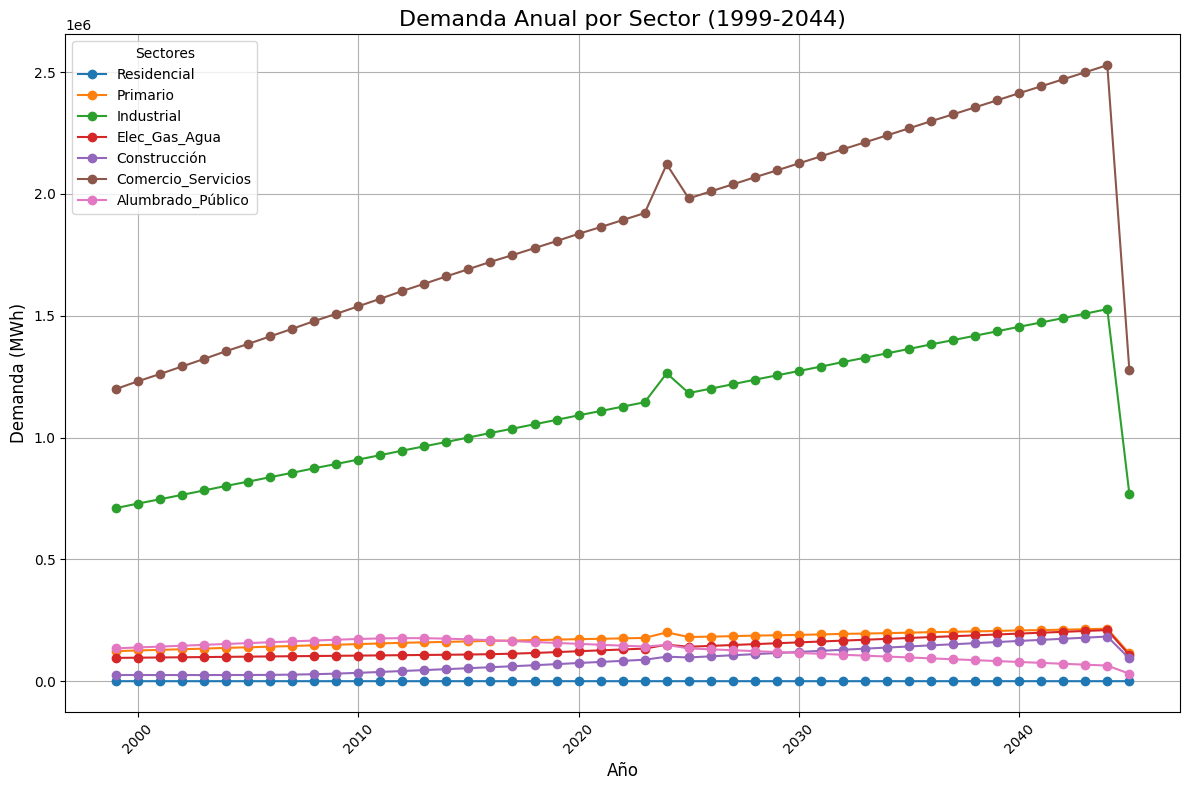

In [26]:
!pip install numpy
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración inicial
sectores = ["Residencial", "Primario", "Industrial", "Elec_Gas_Agua",
            "Construcción", "Comercio_Servicios", "Alumbrado_Público"]

# Ruta de los datos
file_path = os.path.join(folder_path,'combined_file.csv')

# Cargar los datos
raw_data = pd.read_csv(file_path)

# Renombrar las columnas relevantes antes del preprocesamiento
raw_data.rename(columns={
    "Unnamed: 1": "Año",
    "Unnamed: 2": "Mes",
    "Unnamed: 3": "Residencial",
    "Unnamed: 4": "Primario",
    "Unnamed: 5": "Industrial",
    "Unnamed: 6": "Elec_Gas_Agua",
    "Unnamed: 7": "Construcción",
    "Unnamed: 8": "Comercio_Servicios",
    "Unnamed: 9": "Alumbrado_Público",
    "Unnamed: 10": "Total"
}, inplace=True)


# Preprocesamiento de datos
raw_data['Año'] = pd.to_numeric(raw_data['Año'], errors='coerce')
raw_data['Mes'] = pd.to_numeric(raw_data['Mes'], errors='coerce')
raw_data = raw_data[(raw_data['Mes'] >= 1) & (raw_data['Mes'] <= 12)]
raw_data['Fecha'] = raw_data['Año'].astype(int).astype(str) + '-' + raw_data['Mes'].astype(int).astype(str).str.zfill(2)

# Crear DataFrames para cada sector
datos_por_sector = {
    sector: raw_data[['Fecha', sector]].rename(columns={'Fecha': 'ds', sector: 'y'}) for sector in sectores
}

# Almacenar modelos y predicciones
modelos = {}
predicciones = {}

# Predicciones para cada sector
for sector, df in datos_por_sector.items():
    # Convertir la columna ds a datetime
    df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m')

    # Crear y ajustar el modelo Prophet
    #modelo = Prophet()
    #modelo.fit(df)
    # Limpieza y validación previa
    df = df[df['y'].notnull()]
    df['y'] = pd.to_numeric(df['y'], errors='coerce')
    df = df[np.isfinite(df['y'])]
    df = df[df['y'] != 0]

    if df['y'].max() > 1e6:
        print(f"Escalando valores grandes en {sector}")
        df['y'] = df['y'] / 1e6  # Escalar si están en millones

    # Crear y ajustar el modelo Prophet
    modelo = Prophet()
    modelo.fit(df)
    modelos[sector] = modelo

    # Crear DataFrame futuro para predicciones (2024-2044, mensual)
    future = modelo.make_future_dataframe(periods=252, freq='ME')
    predicciones[sector] = modelo.predict(future)

# Crear un DataFrame combinado de predicciones
predicciones_combinadas = []

for sector, forecast in predicciones.items():
    sector_forecast = forecast[['ds', 'yhat']].copy()
    sector_forecast['sector'] = sector
    predicciones_combinadas.append(sector_forecast)

# Concatenar todas las predicciones
predicciones_combinadas_df = pd.concat(predicciones_combinadas)

# Agregar columnas de año y mes para sumarizar
predicciones_combinadas_df['Año'] = predicciones_combinadas_df['ds'].dt.year

# Sumarizar las predicciones por año y sector
suma_anual_por_sector = predicciones_combinadas_df.groupby(['Año', 'sector'])['yhat'].sum().unstack()

# Guardar la tabla de predicciones anuales
output_path = os.path.join(folder_path,'predicciones_anuales_1999_2044.csv')
suma_anual_por_sector.to_csv(output_path)
print(f"Predicciones anuales guardadas en {output_path}")

# Graficar las sumas anuales por sector
plt.figure(figsize=(12, 8))
for sector in sectores:
    plt.plot(suma_anual_por_sector.index, suma_anual_por_sector[sector], marker='o', label=sector)

plt.title('Demanda Anual por Sector (1999-2044)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

20:59:24 - cmdstanpy - INFO - Chain [1] start processing
20:59:24 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster

                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object
                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object


/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1552: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-pa

                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object


20:59:24 - cmdstanpy - INFO - Chain [1] start processing
20:59:24 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster

                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object
                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object


20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster

                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object


20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster

                        ds
count                  552
mean   2021-12-15 12:00:00
min    1999-01-01 00:00:00
25%    2010-06-23 12:00:00
50%    2021-12-16 12:00:00
75%    2033-06-07 12:00:00
max    2044-11-30 00:00:00
ds    0
dtype: int64
          ds
0 1999-01-01
1 1999-02-01
2 1999-03-01
3 1999-04-01
4 1999-05-01
ds    datetime64[ns]
dtype: object
Métricas del modelo guardadas en /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/metricas_modelo_prophet.csv

Métricas del modelo Prophet por sector:
                       MAE    RMSE  MAPE
Sector                                  
Residencial        554,132 557,943   NaN
Primario             7,570   9,124   NaN
Industrial          74,558  74,810   NaN
Elec_Gas_Agua       10,837  12,172   NaN
Construcción         3,995   4,072   NaN
Comercio_Servicios  56,281  58,126   NaN
Alumbrado_Público    3,458   3,741   NaN


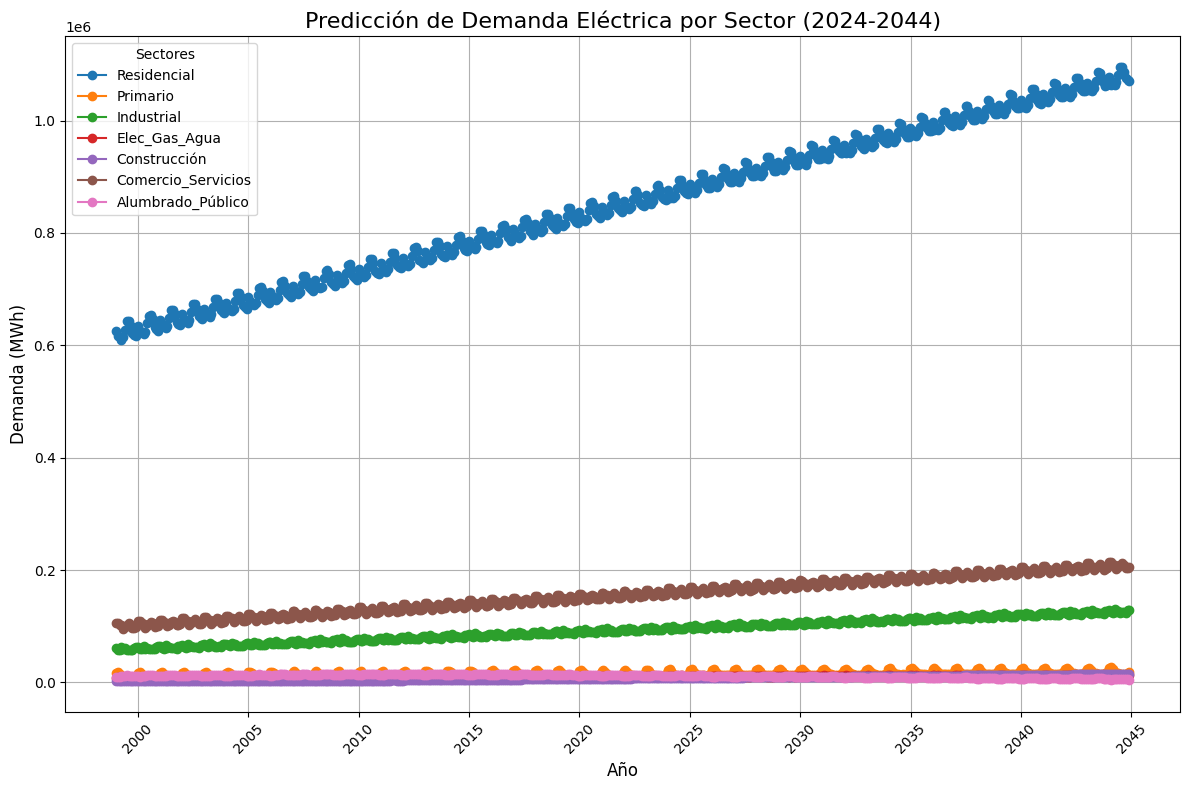

In [27]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Configuración inicial
sectores = ["Residencial", "Primario", "Industrial", "Elec_Gas_Agua",
            "Construcción", "Comercio_Servicios", "Alumbrado_Público"]

# Ruta de los datos
file_path = os.path.join(folder_path, 'combined_file.csv')

# Cargar los datos
raw_data = pd.read_csv(file_path)

# Renombrar las columnas relevantes antes del preprocesamiento
raw_data.rename(columns={
    "Unnamed: 1": "Año",
    "Unnamed: 2": "Mes",
    "Unnamed: 3": "Residencial",
    "Unnamed: 4": "Primario",
    "Unnamed: 5": "Industrial",
    "Unnamed: 6": "Elec_Gas_Agua",
    "Unnamed: 7": "Construcción",
    "Unnamed: 8": "Comercio_Servicios",
    "Unnamed: 9": "Alumbrado_Público",
    "Unnamed: 10": "Total"
}, inplace=True)

# Preprocesamiento de datos
raw_data['Año'] = pd.to_numeric(raw_data['Año'], errors='coerce')
raw_data['Mes'] = pd.to_numeric(raw_data['Mes'], errors='coerce')
raw_data = raw_data[(raw_data['Mes'] >= 1) & (raw_data['Mes'] <= 12)]
raw_data['Fecha'] = raw_data['Año'].astype(int).astype(str) + '-' + raw_data['Mes'].astype(int).astype(str).str.zfill(2)

# Crear DataFrames para cada sector
datos_por_sector = {
    sector: raw_data[['Fecha', sector]].rename(columns={'Fecha': 'ds', sector: 'y'}) for sector in sectores
}

# Almacenar modelos, predicciones y métricas
modelos = {}
predicciones = {}
metricas = {}

# Predicciones y evaluación para cada sector
for sector, df in datos_por_sector.items():
    df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m')

    # Separar datos de entrenamiento y validación (hasta 2023 como entrenamiento)
    df_train = df[df['ds'] < '2024-01-01']
    df_val = df[df['ds'] >= '2024-01-01']

    # Crear y ajustar el modelo Prophet
    modelo = Prophet()
    modelo.fit(df_train)
    modelos[sector] = modelo

    # Hacer predicciones sobre datos de validación (si existen)
    if not df_val.empty:
        future_val = df_val[['ds']]
        forecast_val = modelo.predict(future_val)

        # Calcular métricas
        mae = mean_absolute_error(df_val['y'], forecast_val['yhat'])
        #rmse = mean_squared_error(df_val['y'], forecast_val['yhat'], squared=False)
        rmse = mean_squared_error(df_val['y'], forecast_val['yhat'])**0.5
        mape = (abs(df_val['y'] - forecast_val['yhat']) / df_val['y']).mean() * 100

        # Guardar métricas
        metricas[sector] = {"MAE": mae, "RMSE": rmse, "MAPE": mape}

    # Crear DataFrame futuro para predicciones (2024-2044, mensual)
    future = modelo.make_future_dataframe(periods=252, freq='ME')
    print(future.describe())
    print(future.isnull().sum())
    print(future.head())
    print(future.dtypes)
    predicciones[sector] = modelo.predict(future)

# Mostrar métricas en formato de tabla
metricas_df = pd.DataFrame(metricas).T
metricas_df.index.name = "Sector"

# Guardar métricas en CSV
metricas_path = os.path.join(folder_path, "metricas_modelo_prophet.csv")
metricas_df.to_csv(metricas_path)
print(f"Métricas del modelo guardadas en {metricas_path}")
print("\nMétricas del modelo Prophet por sector:")
print(metricas_df)

# Graficar la demanda anual por sector
plt.figure(figsize=(12, 8))
for sector in sectores:
    plt.plot(predicciones[sector]['ds'], predicciones[sector]['yhat'], marker='o', label=sector)

plt.title('Predicción de Demanda Eléctrica por Sector (2024-2044)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sobre las metricas del prophet:
Explicación de las métricas
*  MAE (Mean Absolute Error - Error Absoluto Medio)
Indica el error promedio entre las predicciones y los valores reales, en unidades de demanda eléctrica (probablemente MWh).
Valores más bajos indican mejor precisión.
* RMSE (Root Mean Squared Error - Raíz del Error Cuadrático Medio)
Similar al MAE, pero penaliza más los errores grandes al elevarlos al cuadrado antes de promediar.
Un RMSE más alto que el MAE sugiere presencia de algunos errores grandes en la predicción.
*  MAPE (Mean Absolute Percentage Error - Error Porcentual Absoluto Medio)
Se usa para medir el error en términos de porcentaje.
Aquí aparece NaN, lo que sugiere que hay valores cero en los datos reales de ciertos sectores, lo que impide el cálculo del MAPE (ya que dividir por cero no es posible).
**Interpretación de los resultados**
**Precisión del modelo en cada sector:**
*  Residencial: Tiene el mayor error absoluto (MAE = 554,377 MWh) y un RMSE muy cercano (557,294 MWh), lo que sugiere errores significativos y estables.
*  Primario: MAE y RMSE pequeños (7,562 y 9,121), indicando una buena precisión.
*  Industrial: Tiene un error considerable (MAE = 74,558), pero proporcionalmente mejor que Residencial.
*  Elec_Gas_Agua y Construcción: Errores relativamente bajos, lo que indica que el modelo predice bien estos sectores.
*  Comercio y Servicios: Errores medios (MAE = 56,281), indicando cierta dificultad en la predicción.
*  Alumbrado Público: Tiene el menor error absoluto, lo que sugiere que es el sector más fácil de predecir.
**Conclusión**
El modelo es más preciso en sectores como Primario, Construcción y Alumbrado Público.
El sector Residencial tiene errores significativamente altos, lo que sugiere que el modelo no capta bien su variabilidad.
El MAPE no pudo calcularse debido a valores cero en los datos reales de algunos sectores.
Podría ser necesario ajustar mejor el modelo para el sector Residencial y Comercio/Servicios.
📌 Siguientes pasos posibles:
Revisar posibles valores atípicos en los datos.
Ajustar los hiperparámetros de Prophet, como seasonality_mode='multiplicative'.
Considerar modelos adicionales o métodos híbridos para el sector Residencial

In [28]:
#####################################


Procesando sector: Residencial


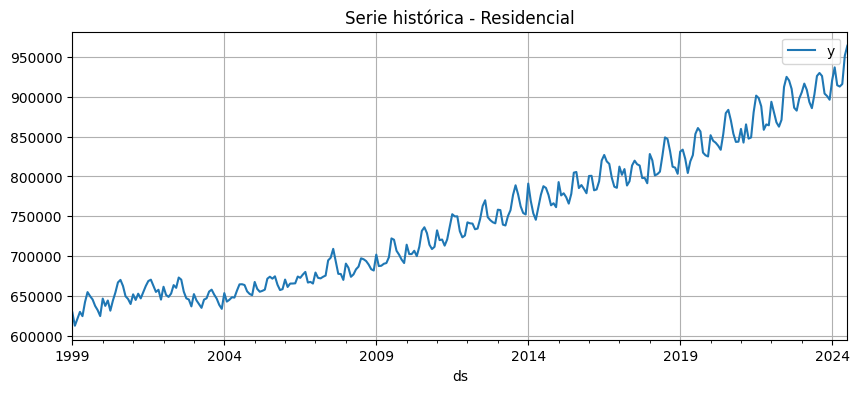

20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing



Procesando sector: Primario


/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1552: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-pa

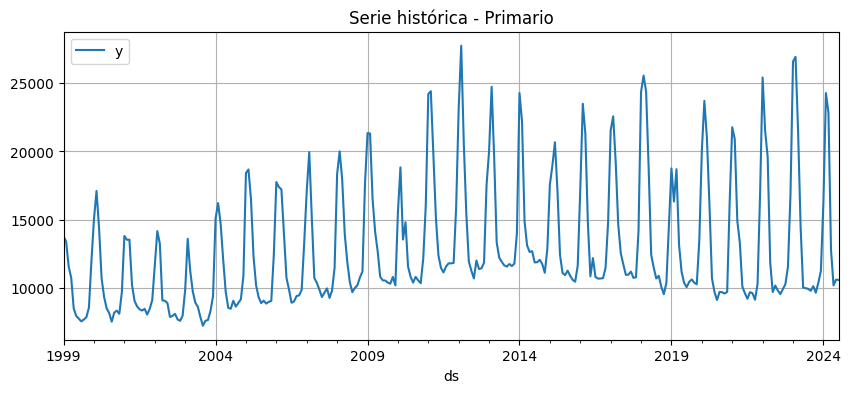

20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster


Procesando sector: Industrial


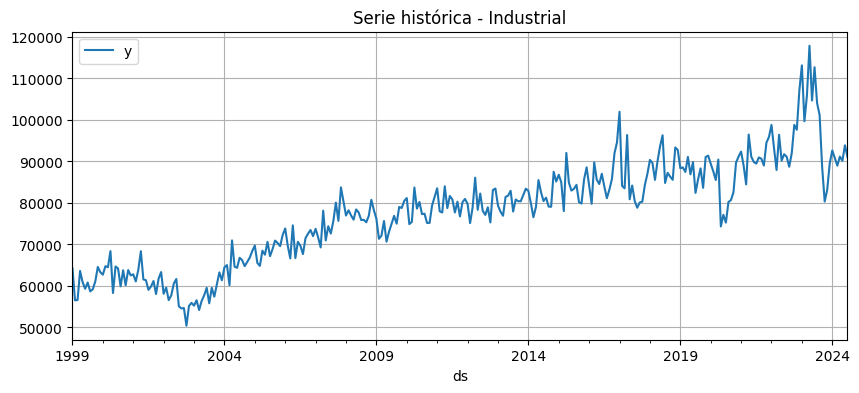

20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster


Procesando sector: Elec_Gas_Agua


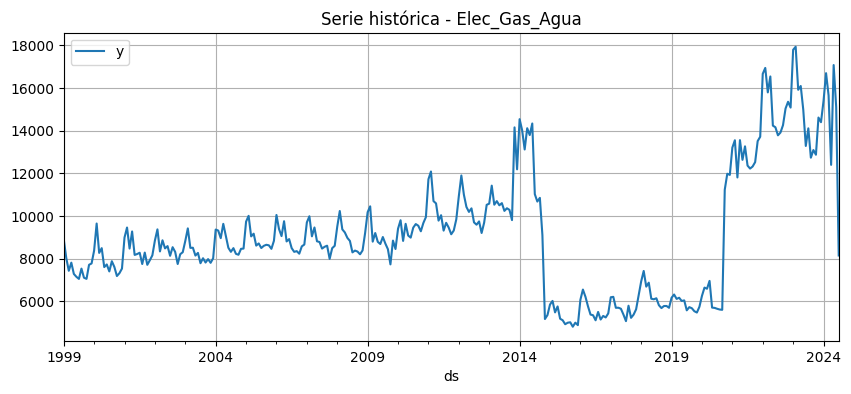

20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster


Procesando sector: Construcción


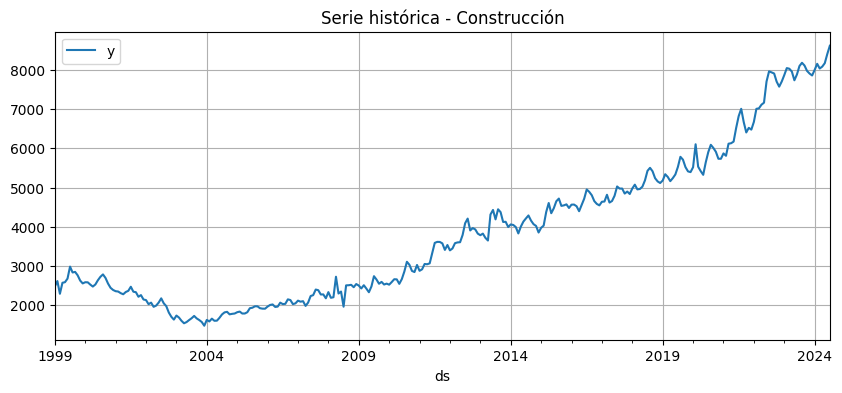

20:59:25 - cmdstanpy - INFO - Chain [1] start processing
20:59:25 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster


Procesando sector: Comercio_Servicios


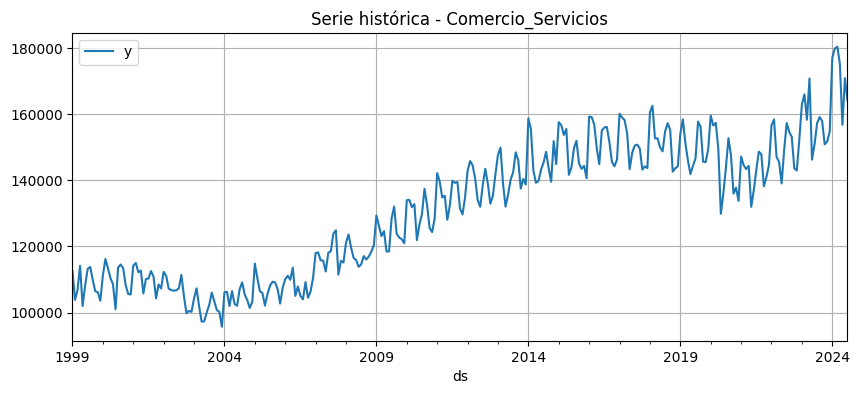

20:59:26 - cmdstanpy - INFO - Chain [1] start processing
20:59:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster


Procesando sector: Alumbrado_Público


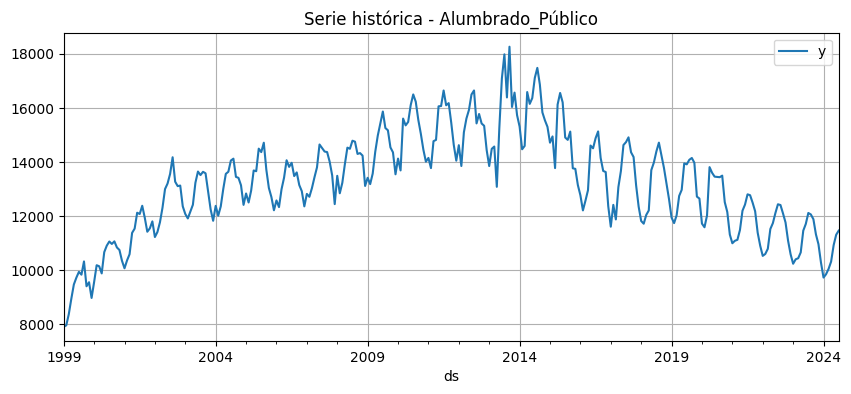

20:59:26 - cmdstanpy - INFO - Chain [1] start processing
20:59:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1415: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster.py:1550: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/envs/r_env/lib/python3.13/site-packages/prophet/forecaster

Predicciones anuales guardadas en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_anuales_1999_2044.csv


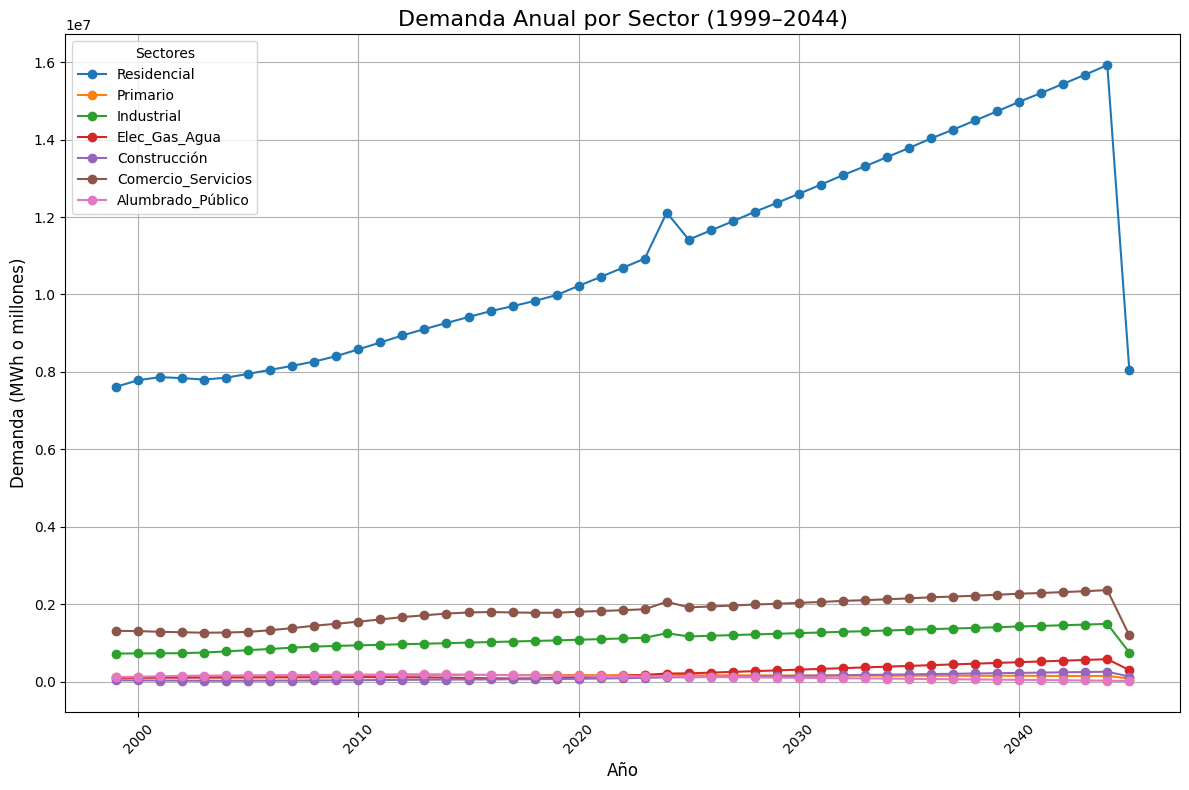

In [29]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
sectores = ["Residencial", "Primario", "Industrial", "Elec_Gas_Agua",
            "Construcción", "Comercio_Servicios", "Alumbrado_Público"]

# Cargar los datos
file_path = os.path.join(folder_path, 'combined_file.csv')
raw_data = pd.read_csv(file_path)

# Renombrar columnas
raw_data.rename(columns={
    "Unnamed: 1": "Año",
    "Unnamed: 2": "Mes",
    "Unnamed: 3": "Residencial",
    "Unnamed: 4": "Primario",
    "Unnamed: 5": "Industrial",
    "Unnamed: 6": "Elec_Gas_Agua",
    "Unnamed: 7": "Construcción",
    "Unnamed: 8": "Comercio_Servicios",
    "Unnamed: 9": "Alumbrado_Público",
    "Unnamed: 10": "Total"
}, inplace=True)

# Preprocesamiento de columnas de fecha
raw_data['Año'] = pd.to_numeric(raw_data['Año'], errors='coerce')
raw_data['Mes'] = pd.to_numeric(raw_data['Mes'], errors='coerce')
raw_data = raw_data[(raw_data['Mes'] >= 1) & (raw_data['Mes'] <= 12)]
raw_data['Fecha'] = raw_data['Año'].astype(int).astype(str) + '-' + raw_data['Mes'].astype(int).astype(str).str.zfill(2)

# Crear estructura por sector
datos_por_sector = {
    sector: raw_data[['Fecha', sector]].rename(columns={'Fecha': 'ds', sector: 'y'}) for sector in sectores
}

# Inicializar diccionarios
modelos = {}
predicciones = []

# Proceso para cada sector
for sector, df in datos_por_sector.items():
    print(f"\nProcesando sector: {sector}")

    # Preparar columnas
    df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m', errors='coerce')
    df['y'] = pd.to_numeric(df['y'], errors='coerce')

    # Limpieza de datos
    df = df[df['ds'].notna()]
    df = df[df['y'].notna()]
    df = df[np.isfinite(df['y'])]
    df = df[df['y'] > 0]
    
    # Agrupar si hay fechas duplicadas
    df = df.groupby('ds').mean().reset_index()

    # Clip para evitar outliers extremos
    df['y'] = df['y'].clip(lower=0, upper=df['y'].quantile(0.999))

    # Escalado si es necesario
    if df['y'].max() > 1e6:
        print(f"  Escalando valores en {sector}")
        df['y'] = df['y'] / 1e6

    # Visualizar (opcional)
    df.plot(x='ds', y='y', title=f'Serie histórica - {sector}', figsize=(10, 4))
    plt.grid(True)
    plt.show()

    # Entrenar modelo
    modelo = Prophet()
    modelo.fit(df)
    modelos[sector] = modelo

    # Generar fechas futuras mensuales (252 meses = 21 años)
    future = modelo.make_future_dataframe(periods=252, freq='ME')
    forecast = modelo.predict(future)
    forecast['sector'] = sector
    predicciones.append(forecast[['ds', 'yhat', 'sector']])

# Combinar predicciones
predicciones_df = pd.concat(predicciones)
predicciones_df['Año'] = predicciones_df['ds'].dt.year

# Sumar anual por sector
suma_anual_por_sector = predicciones_df.groupby(['Año', 'sector'])['yhat'].sum().unstack()

# Exportar
output_path = os.path.join(folder_path, 'predicciones_anuales_1999_2044.csv')
suma_anual_por_sector.to_csv(output_path)
print(f"Predicciones anuales guardadas en: {output_path}")

# Graficar resultado
plt.figure(figsize=(12, 8))
for sector in sectores:
    if sector in suma_anual_por_sector.columns:
        plt.plot(suma_anual_por_sector.index, suma_anual_por_sector[sector], marker='o', label=sector)

plt.title('Demanda Anual por Sector (1999–2044)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh o millones)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Predicciones anuales guardadas en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_anuales_1999_2044.csv


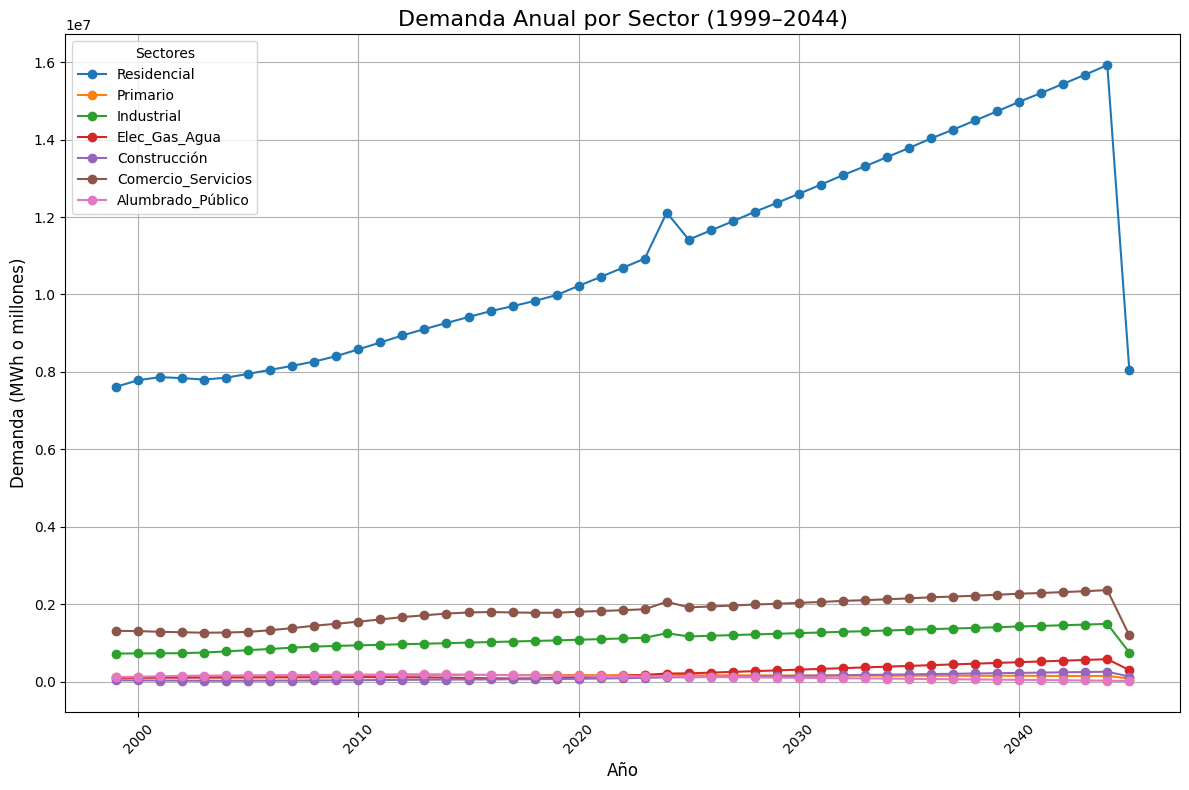

In [31]:
# Combinar predicciones
predicciones_df = pd.concat(predicciones)
predicciones_df['Año'] = predicciones_df['ds'].dt.year

# Crear tabla anual por sector usando pivot_table para asegurar nombres correctos en columnas
suma_anual_por_sector = predicciones_df.pivot_table(
    index='Año',
    columns='sector',
    values='yhat',
    aggfunc='sum'
)

# Exportar CSV
output_path = os.path.join(folder_path, 'predicciones_anuales_1999_2044.csv')
suma_anual_por_sector.to_csv(output_path)
print(f"Predicciones anuales guardadas en: {output_path}")

# Graficar resultado
plt.figure(figsize=(12, 8))
for sector in sectores:
    if sector in suma_anual_por_sector.columns:
        plt.plot(suma_anual_por_sector.index, suma_anual_por_sector[sector], marker='o', label=sector)

plt.title('Demanda Anual por Sector (1999–2044)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh o millones)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Predicciones anuales guardadas en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_anuales_1999_2044.csv


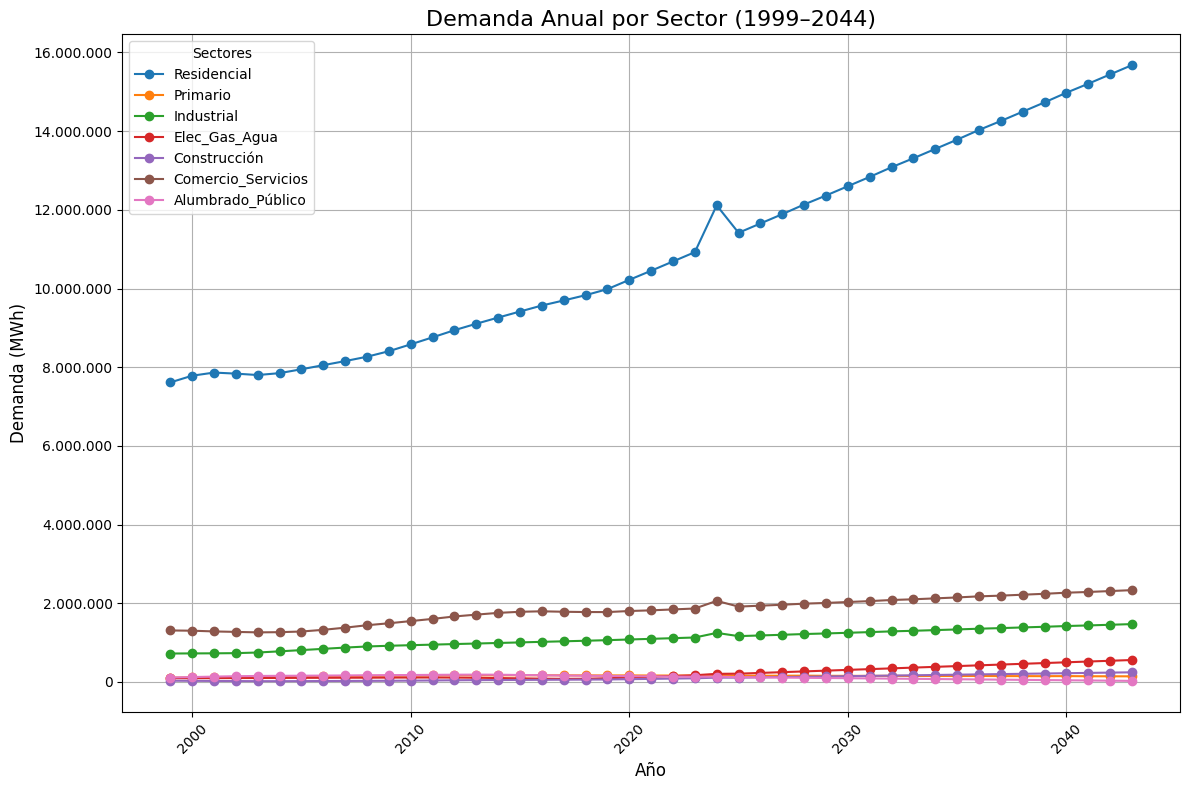

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Combinar predicciones
predicciones_df = pd.concat(predicciones)
predicciones_df['Año'] = predicciones_df['ds'].dt.year

# Quitar año 2044
predicciones_df = predicciones_df[predicciones_df['Año'] < 2044]

# Crear tabla anual por sector usando pivot_table
suma_anual_por_sector = predicciones_df.pivot_table(
    index='Año',
    columns='sector',
    values='yhat',
    aggfunc='sum'
)

# Exportar CSV
output_path = os.path.join(folder_path, 'predicciones_anuales_1999_2044.csv')
suma_anual_por_sector.to_csv(output_path)
print(f"Predicciones anuales guardadas en: {output_path}")

# Función para formatear con separador de miles estilo latino (ej: 10.000)
def formato_miles(x, pos):
    return f'{x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

formatter = mtick.FuncFormatter(formato_miles)

# Graficar resultado
plt.figure(figsize=(12, 8))
for sector in sectores:
    if sector in suma_anual_por_sector.columns:
        plt.plot(suma_anual_por_sector.index, suma_anual_por_sector[sector], marker='o', label=sector)

plt.title('Demanda Anual por Sector (1999–2044)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (MWh)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)

# Aplicar formateador personalizado al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Predicciones anuales guardadas en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_anuales_1999_2043_MWh_millones.csv


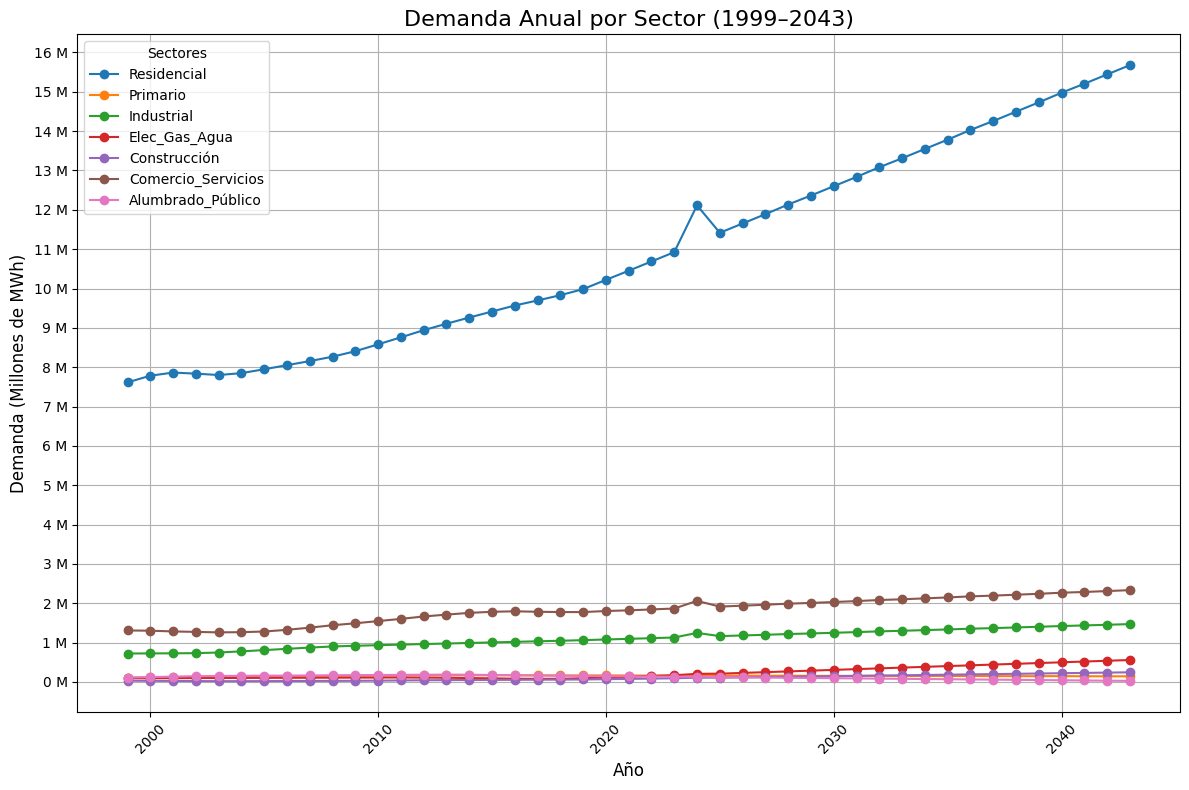

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator

# Combinar predicciones
predicciones_df = pd.concat(predicciones)
predicciones_df['Año'] = predicciones_df['ds'].dt.year

# Quitar año 2044
predicciones_df = predicciones_df[predicciones_df['Año'] < 2044]

# Convertir a millones
predicciones_df['yhat'] = predicciones_df['yhat'] / 1e6

# Crear tabla anual por sector usando pivot_table
suma_anual_por_sector = predicciones_df.pivot_table(
    index='Año',
    columns='sector',
    values='yhat',
    aggfunc='sum'
)

# Exportar CSV (ya en millones)
output_path = os.path.join(folder_path, 'predicciones_anuales_1999_2043_MWh_millones.csv')
suma_anual_por_sector.to_csv(output_path)
print(f"Predicciones anuales guardadas en: {output_path}")

# Formateador: 0 M, 1 M, 2 M...
def formato_millones_enteros(x, pos):
    return f'{int(x):,} M'.replace(',', '.')

formatter = mtick.FuncFormatter(formato_millones_enteros)

# Graficar resultado
plt.figure(figsize=(12, 8))
for sector in sectores:
    if sector in suma_anual_por_sector.columns:
        plt.plot(suma_anual_por_sector.index, suma_anual_por_sector[sector], marker='o', label=sector)

plt.title('Demanda Anual por Sector (1999–2043)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Demanda (Millones de MWh)', fontsize=12)
plt.legend(title="Sectores")
plt.grid(True)
plt.xticks(rotation=45)

# Configurar ticks del eje Y: paso de 1 millón
plt.gca().yaxis.set_major_locator(MultipleLocator(1))  # salto de 1 unidad (1 millón)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

✔ CSV mensual guardado para Residencial: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Residencial.csv
✔ CSV mensual guardado para Primario: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Primario.csv
✔ CSV mensual guardado para Industrial: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Industrial.csv
✔ CSV mensual guardado para Elec_Gas_Agua: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Elec_Gas_Agua.csv
✔ CSV mensual guardado para Construcción: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Construcción.csv
✔ CSV mensual guardado para Comercio_Servicios: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/raw/predicciones_mensuales_por_sector/predicciones_mensuales_Comercio_Servicios.csv
✔ CSV mensual guardado para 

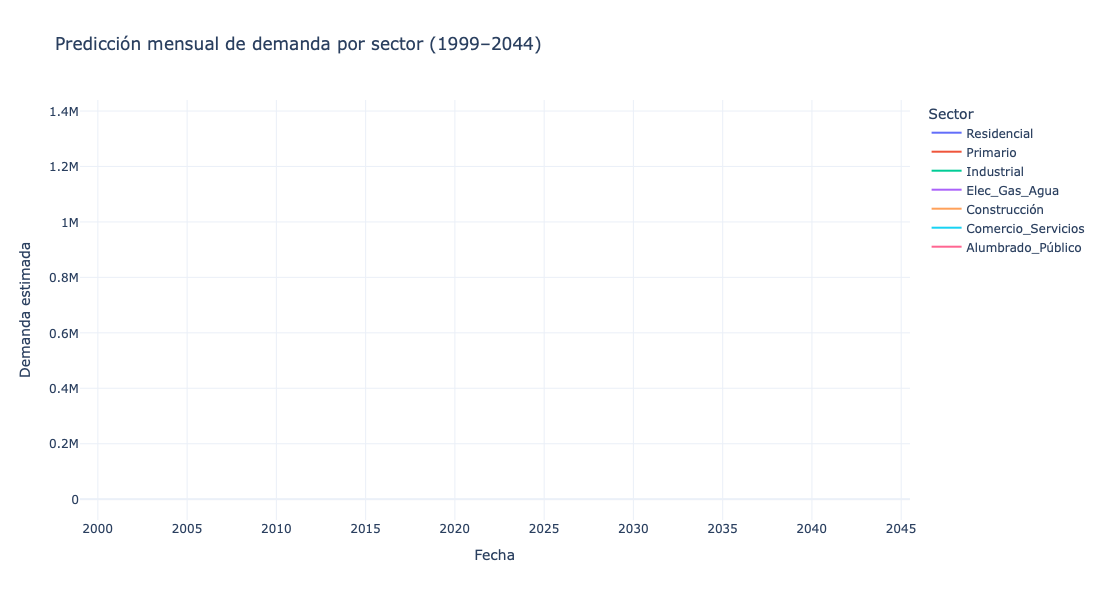

In [30]:
!pip install plotly
import os
import plotly.express as px

# Crear carpeta de salida para predicciones mensuales si no existe
output_folder_mensual = os.path.join(folder_path, 'predicciones_mensuales_por_sector')
os.makedirs(output_folder_mensual, exist_ok=True)

# Concatenar todas las predicciones y agregar año y mes
predicciones_df = pd.concat(predicciones)
predicciones_df['Año'] = predicciones_df['ds'].dt.year
predicciones_df['Mes'] = predicciones_df['ds'].dt.month

# Guardar CSV mensual por sector
for sector in predicciones_df['sector'].unique():
    df_sector = predicciones_df[predicciones_df['sector'] == sector]
    nombre_archivo = f"predicciones_mensuales_{sector}.csv".replace(" ", "_")
    path_csv = os.path.join(output_folder_mensual, nombre_archivo)
    df_sector.to_csv(path_csv, index=False)
    print(f"✔ CSV mensual guardado para {sector}: {path_csv}")

# Guardar CSV consolidado de todas las predicciones mensuales
csv_mensual_total = os.path.join(folder_path, 'predicciones_mensuales_todas.csv')
predicciones_df.to_csv(csv_mensual_total, index=False)
print(f"✔ CSV consolidado mensual guardado: {csv_mensual_total}")

# Gráfico interactivo con Plotly
fig = px.line(
    predicciones_df,
    x="ds",
    y="yhat",
    color="sector",
    title="Predicción mensual de demanda por sector (1999–2044)",
    labels={"ds": "Fecha", "yhat": "Demanda estimada", "sector": "Sector"},
    hover_data={"Año": True, "Mes": True}
)

fig.update_layout(
    template="plotly_white",
    hovermode="x unified",
    width=1000,
    height=600
)

fig.show()